In [1]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url, error_bad_lines=False)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Bd", "Bangladesh")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")
death['Country/Region']= death['Country/Region'].str.replace("Bd", "Bangladesh")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")
recover['Country/Region']= recover['Country/Region'].str.replace("Bd", "Bangladesh")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")
confirmed.iloc[10:22,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21
10,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,376,393,393,414,414,444,448,474,496,510
11,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,2613,2977,2977,3563,4322,5033,6961,8534,10752,10752
12,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,1554,1747,2229,2917,3550,4324,5162,6160,7625,8993
13,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,266,292,288,353,353,434,483,540,637,637
14,Victoria,Australia,-37.813600,144.963100,0,0,0,0,1,1,...,149595,151577,153631,155739,157347,159147,161845,165595,170732,176614
15,Western Australia,Australia,-31.950500,115.860500,0,0,0,0,0,0,...,1126,1130,1136,1133,1142,1143,1148,1148,1148,1153
16,NaN,Austria,47.516200,14.550100,0,0,0,0,0,0,...,1253961,1256230,1258377,1260751,1262836,1264553,1266103,1268519,1271770,1274995
17,NaN,Azerbaijan,40.143100,47.576900,0,0,0,0,0,0,...,611557,612205,613059,613618,614119,614630,614936,615312,615842,616352
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,23135,23240,23380,23539,23539,23539,23539,23539,24204,24269
19,NaN,Bahrain,26.027500,50.550000,0,0,0,0,0,0,...,278714,278875,279056,279277,279518,279805,280109,280482,280876,281406


In [6]:
death.iloc[10:22,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21
10,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
11,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
12,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,4,4,4,4,4,4,5,5,5,6
13,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
14,Victoria,Australia,-37.813600,144.963100,0,0,0,0,0,0,...,1466,1476,1484,1490,1492,1495,1499,1504,1517,1525
15,Western Australia,Australia,-31.950500,115.860500,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
16,NaN,Austria,47.516200,14.550100,0,0,0,0,0,0,...,13538,13567,13595,13617,13626,13634,13650,13672,13689,13701
17,NaN,Azerbaijan,40.143100,47.576900,0,0,0,0,0,0,...,8222,8238,8257,8269,8284,8297,8308,8324,8332,8346
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,713,713,713,713,713,713,713,713,713,716
19,NaN,Bahrain,26.027500,50.550000,0,0,0,0,0,0,...,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394


In [11]:
# population = pd.read_csv('data/global_population.csv') 
# confirmed = pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
# death = pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
# recover = pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [12]:
# merge region
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)

In [13]:
confirmed.iloc[10:22,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,region
10,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,393,393,414,414,444,448,474,496,510,Australia_Northern Territory
11,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,2977,2977,3563,4322,5033,6961,8534,10752,10752,Australia_Queensland
12,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,1747,2229,2917,3550,4324,5162,6160,7625,8993,Australia_South Australia
13,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,292,288,353,353,434,483,540,637,637,Australia_Tasmania
14,Victoria,Australia,-37.813600,144.963100,0,0,0,0,1,1,...,151577,153631,155739,157347,159147,161845,165595,170732,176614,Australia_Victoria
15,Western Australia,Australia,-31.950500,115.860500,0,0,0,0,0,0,...,1130,1136,1133,1142,1143,1148,1148,1148,1153,Australia_Western Australia
16,NaN,Austria,47.516200,14.550100,0,0,0,0,0,0,...,1256230,1258377,1260751,1262836,1264553,1266103,1268519,1271770,1274995,Austria_nan
17,NaN,Azerbaijan,40.143100,47.576900,0,0,0,0,0,0,...,612205,613059,613618,614119,614630,614936,615312,615842,616352,Azerbaijan_nan
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,23240,23380,23539,23539,23539,23539,23539,24204,24269,Bahamas_nan
19,NaN,Bahrain,26.027500,50.550000,0,0,0,0,0,0,...,278875,279056,279277,279518,279805,280109,280482,280876,281406,Bahrain_nan


In [14]:
df_bd = confirmed[confirmed['Country/Region'] == 'Bangladesh']
df_bd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,region
20,NaN,Bangladesh,23.685,90.3563,0,0,0,0,0,0,...,1581986,1582368,1582710,1582985,1583253,1583626,1584023,1584518,1585027,Bangladesh_nan


In [15]:
df_bd_rec = recover[recover['Country/Region'] == 'Bangladesh']
df_bd_rec

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,region
20,NaN,Bangladesh,23.685,90.3563,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangladesh_nan


In [21]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long'], axis=1)#,' Population '
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [22]:
ts=create_ts(confirmed)
ts_d=create_ts(death)
ts_rec=create_ts(recover)
ts.tail()

region,Afghanistan_nan,Albania_nan,Algeria_nan,Andorra_nan,Angola_nan,Antigua and Barbuda_nan,Argentina_nan,Armenia_nan,Australia_Australian Capital Territory,Australia_New South Wales,...,United States_nan,Uruguay_nan,Uzbekistan_nan,Vanuatu_nan,Venezuela_nan,Vietnam_nan,West Bank and Gaza_nan,Yemen_nan,Zambia_nan,Zimbabwe_nan
12/26/21,157951,207709,216637,21730,71752,4236,5460042,344481,2942,137011,...,52280854,407381,198242,7,443332,1651673,467682,10115,233120,204351
12/27/21,157967,207709,216930,22332,71752,4259,5480305,344540,3186,143042,...,52793407,407981,198387,7,443332,1666545,468619,10118,234476,205449
12/28/21,157998,208352,217265,22540,76787,4259,5514207,344649,3311,154191,...,53170421,408894,198487,7,443983,1680985,469452,10123,238383,207548
12/29/21,158037,208899,217647,22823,78475,4259,5556239,344737,3559,166373,...,53659688,410311,198626,7,443983,1694874,469748,10125,243638,207548
12/30/21,158056,208899,218037,23122,79871,4283,5606745,344826,3564,166373,...,54306755,411658,198769,7,444411,1714742,469748,10126,249193,211728


Text(0.5, 1.0, 'Daily Total Recoverd - Major areas')

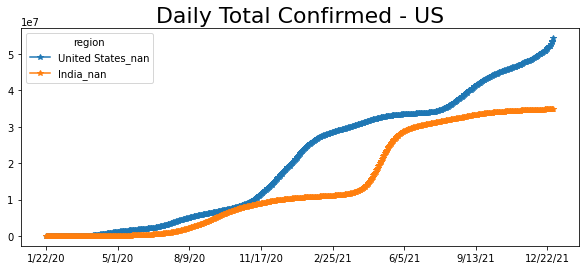

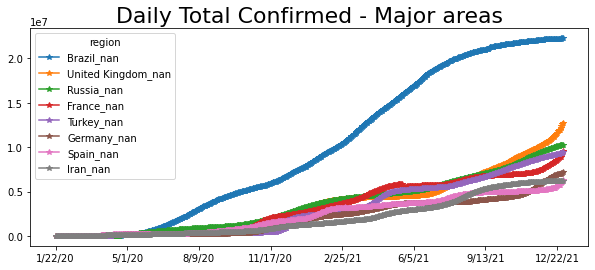

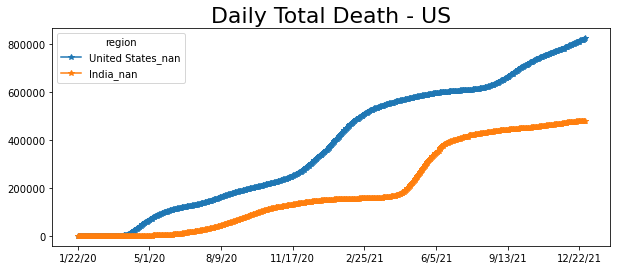

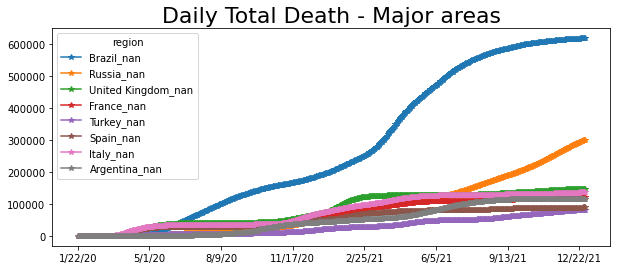

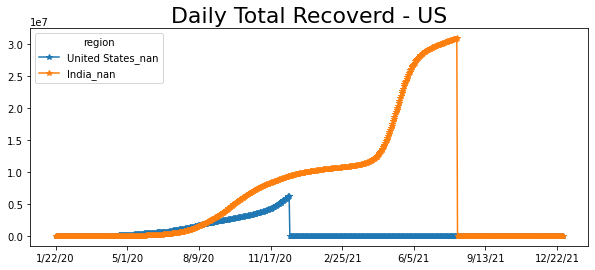

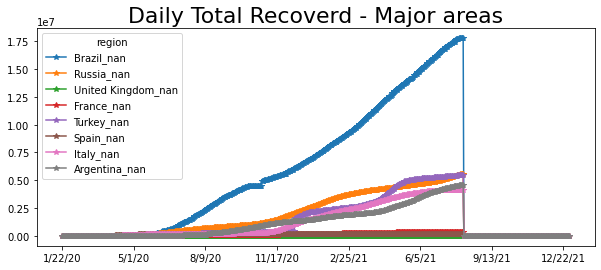

In [23]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:2].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - US',fontdict={'fontsize': 22})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:2].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - US',fontdict={'fontsize': 22})
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:2].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - US',fontdict={'fontsize': 22})
p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22})

In [ ]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:2].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - US',fontdict={'fontsize': 22})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:2].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - US',fontdict={'fontsize': 22})
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:2].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - US',fontdict={'fontsize': 22})
p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22})